<h1>
  <hr>
      <b>
        Prediccion de falla en motores
      </b>
  <hr>
</h1>


#### Análisis  y preprocesamiento de datos
Primeramente se obtiene la información descriptiva del dataset, de manera que se pueda comprender a qué corresponde cada variable, sus valores y así tener un  contexto y análisis  general. La variables a procesar son las siguientes:
UID: identificador único que va de 1 a 10 000 
Type: consta de una letra L, M o H para bajo (50 % de todos los productos),medio ( 30 %) y alta (20 %) 
Air Temperature [K]: generada mediante un proceso de recorrido aleatorio y luego normalizado a una desviación estándar de 2 K alrededor de 300 K 
Process Temperature [K]: generado utilizando un proceso de paseo aleatorio normalizado a una desviación estándar de 1 K, sumado a la temperatura del aire más 10 K.
Rotational Speed [rpm]: calculada a partir de una potencia de 2860 W, superpuesta con un ruido normalmente distribuido 
Torque [Nm]: par los valores se distribuyen normalmente alrededor de 40 Nm con un Ïƒ = 10 Nm y sin valores negativos.
Tool Wear [min]: Las variantes de calidad H/M/L añaden 5/3/2 minutos de desgaste de herramienta a la herramienta utilizada en el proceso.
Las variables previamente descritas corresponden a la matriz de entrada X, en donde se plantea realizar un modelamiento de estas para predecir su un motor va a presentar fallas o no, considerando como salida esperada Y a la variable “Target”, donde:  (0)  no presenta fallas , (1) presenta fallas.
Una vez comprendida la naturaleza de los datos, se procede programar un pipeline para el preprocesamiento de los datos y así dejar preparada la data para el modelo.


#### Instalamos pyprind para simular una barra de progreso a la hora de entrenar la red neuronal.

In [ ]:
!pip install pyprind

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Importamos librerias necesarias.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import pyprind

#### Leemos el dataset y lo almacenamos en un pandas Dataframe.

In [ ]:
df = pd.read_csv("predictive_maintenance.csv")

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


#### Imprimimos una descripcion estadistica de la data numerica por columna, datos como la media, la desviacion estandar, percentiles, minimos-maximos, etc.

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


#### Desplegamos informacion extra del dataset, como el tipo de dato al que pertenece y posibles valores NaN (not a number).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


#### Eliminamos del dataset columnas que tienen valores unicos, como ID's ya que estos representan datos atipicos dentro del dataset y el modelo no seria capaz de aprender correctamente, y adicionalmente eliminamos elementos duplicados para ahorrar espacio en memoria, ya que serian datos reduntantes.

In [ ]:
df_droped = df.drop(columns = ["UDI", "Product ID","Failure Type"])

dataset = df_droped.drop_duplicates()

dataset.shape

(10000, 7)

#### Transformamos la columna type a formato numerico, donde L = 0 ; M = 1; H = 2, todo esto de forma automatica utilizando la clase LabelEncoder de sklearn.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['Type'] = encoder.fit_transform(dataset['Type'])

#### Graficamos una matriz de correlacion de cada variable del dataset, para analizar que tan correlacionadas estan cada una de las variables, esto utilizando la funcion heatmap de seaborn.

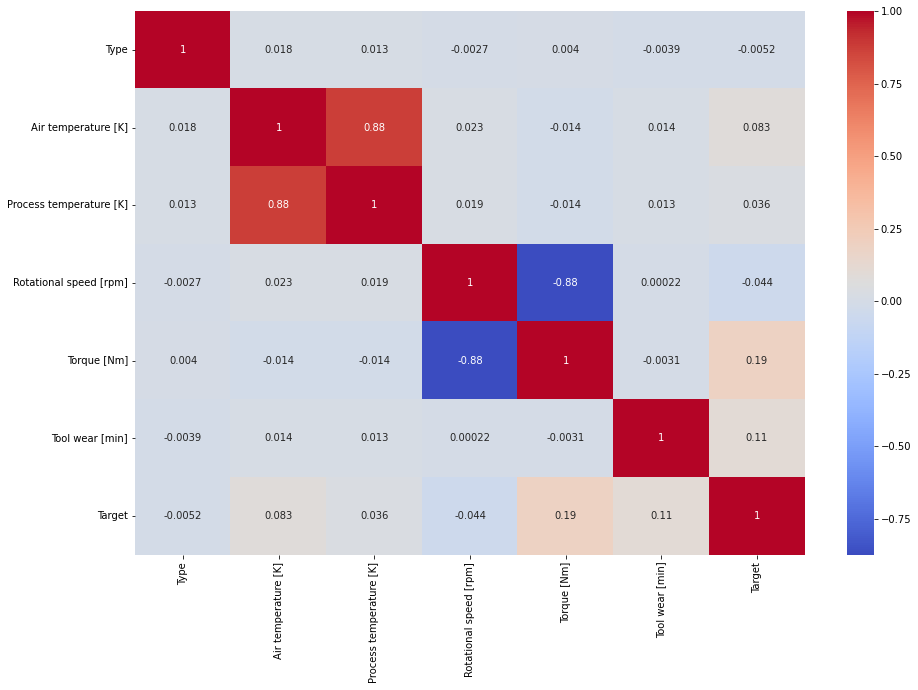

In [ ]:
heat = plt.figure(figsize = (15,10))

sns.heatmap(data = dataset.corr(),
            annot = True,
            cmap='coolwarm')

plt.plot()
plt.show()

#### Graficamos la distribucion de los datos para la variable type, en donde podemos visualizar que en su mayoria el dataset contiene gran cantidad de motores de tipo "L" (LOW  GAMMA).

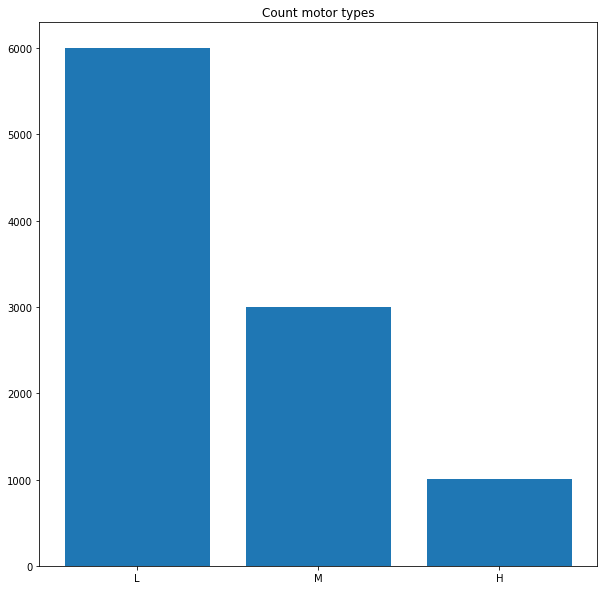

In [ ]:
fig1 = plt.figure(figsize=(10,10))

plt.bar(x = ['L','M','H'],
        height = dataset['Type'].value_counts())

plt.plot()
plt.title("Count motor types")
plt.show()

#### Se grafica distribucion del target del dataset, o variable a predecir, de manera que se pueda comprender cuantas instancias de cada clase existen en el dataset, donde se puede ver que el dataset esta sesgado mayormente a motores que no presentan fallas.Esto si bien no perjudica el rendimiento del modelo directamente (dependiendo de la metrica que se utilice), puede sesgar al modelo a unicamente aprender a predecir las no-fallas de motores, de manera que cuando este falle, posiblemente no lo detecte como tal, sino que por descarte asignara a este como falla.

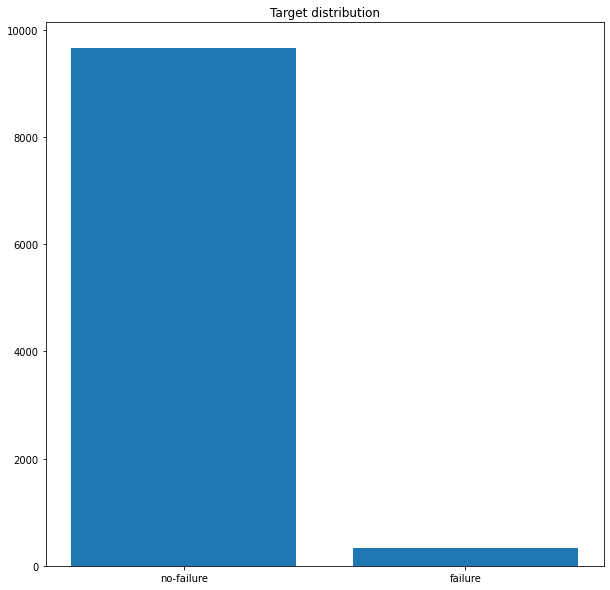

In [ ]:
fig1 = plt.figure(figsize=(10,10))

plt.bar(x = ['no-failure','failure'],
        height = dataset["Target"].value_counts())

plt.plot()
plt.title("Target distribution")
plt.show()

#### Extraemos matriz X y el vector Y del dataset, y los asignamos a variables X_imb ; y_imb, que representan los datos inbalanceados en funcion de la distribucion previamente analizada.

In [ ]:
X_imb = dataset.drop(columns = "Target").values

y_imb = dataset["Target"].values

#### Utilizamos el modelo Kmeans para generar datos sinteticos con el finde balancear el dataset, de forma que se obtenga una distribucion de clase similar.Para ello, le proporcionamos  nuestra X e y  imbalanceados y generamos nuevas X-y ya sintetizados, los cuales llamaremos  X_resampled ; y_resampled. Normalizamos matriz X con el fin de que el modelo tenga una correcta convergencia, esto utlizando la clase StandardScaler de sklearn y finalmente creamos un nuevo dataframe con la nueva data generada, aplicamos una reordenacion aleatoria (shuffle) y lo llamaremos balanced_dataset.

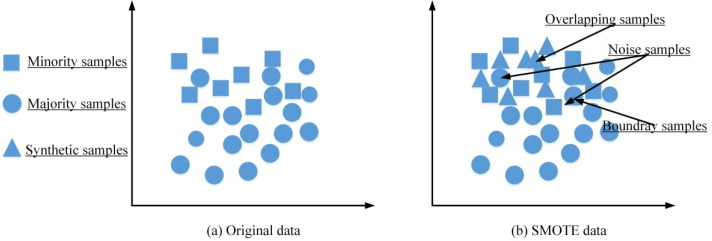

In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import KMeansSMOTE 

cols = dataset.columns

scaler = StandardScaler()

ksmote = KMeansSMOTE(random_state = 101,
                     k_neighbors = 7,
                     n_jobs = -1,
                     cluster_balance_threshold = 0)

X_resampled, y_resampled = ksmote.fit_resample(X_imb, y_imb)

X_normalized = scaler.fit_transform(X_resampled)

balanced_dataset = pd.DataFrame(data = X_normalized,columns = cols[0:len(cols) - 1])

balanced_dataset["Target"] = y_resampled

balanced_dataset = shuffle(balanced_dataset)

balanced_dataset.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
4847,-0.323356,1.509636,1.324434,-0.056280,-0.295591,-0.919033,0
9836,1.603653,-1.058552,-0.638852,-0.321447,0.448892,-2.044477,0
820,-0.323356,-1.931735,-1.922538,0.437896,-0.891177,0.129326,0
4475,-0.323356,1.150090,0.267280,-0.556482,-0.527208,-1.967392,1
19023,-0.323356,-1.170946,-1.347320,-0.578072,0.880643,0.993678,1


#### Graficamos nuevamente la distribucion de nuestro target, y verificamos la correcta distribucion una vez aplicada la generacion de datos sinteticos con Kmeans smote.

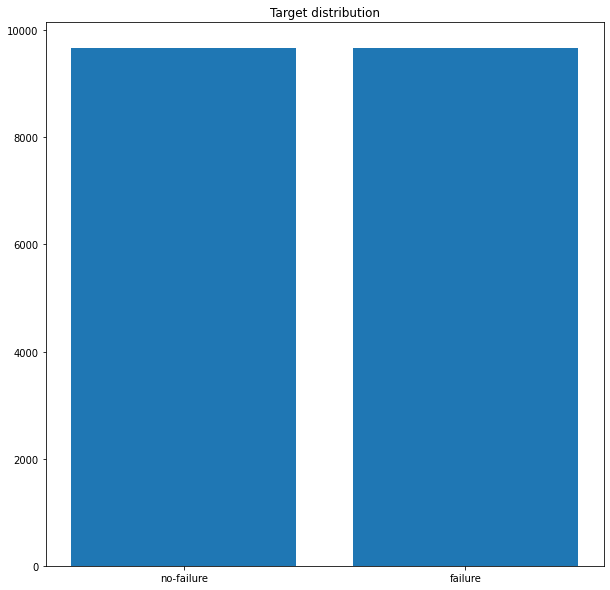

In [ ]:
fig1 = plt.figure(figsize=(10,10))

plt.bar(x = ['no-failure','failure'],
        height = balanced_dataset["Target"].value_counts())

plt.plot()
plt.title("Target distribution")
plt.show()

#### Graficamos distribucion de la matriz X (todas las variables) para verificar que estan dentro de una escala similar.

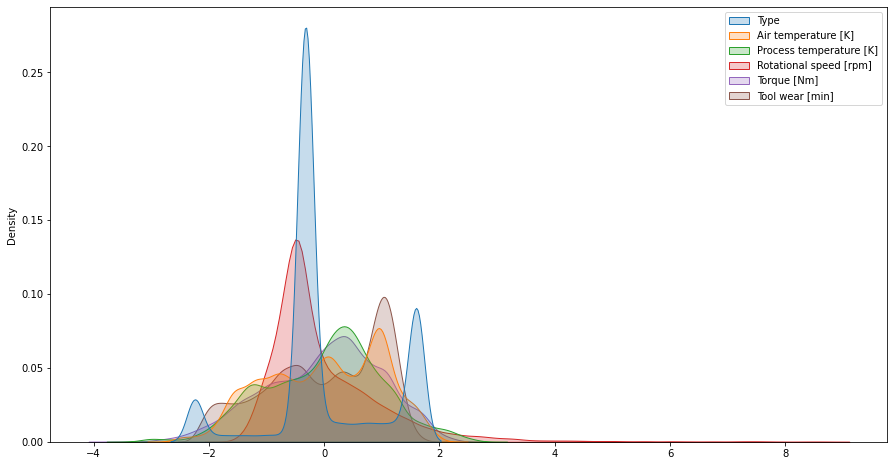

In [ ]:
figx = plt.figure(figsize = (15,8))

sns.kdeplot(data = balanced_dataset[cols[0:len(cols) - 1]],shade = True)

plt.show()

#### Primeramente,se genera un split de entrenamiento y de prueba desde dataset utilizando se realiza un modelado del dataset utilizando el modelo SVM (support vector machines) utilizando la clase SVC (support vector classifier) de sklearn, entrenamos el modelo y autilizamos el algoritmo de validacion cruzada (k-fold cross validation) para determinar el accuracy del modelo para los datos de entrenamiento, separandolos en sub conjuntos de entrenamiento y test, verificando asi que la data no esta sesgada, esto configurando el parametro cv el cual toma los k-pliegues del dataset y calcula el accuracy.Finalmente imprimimos el accuracy de entrenamiento.

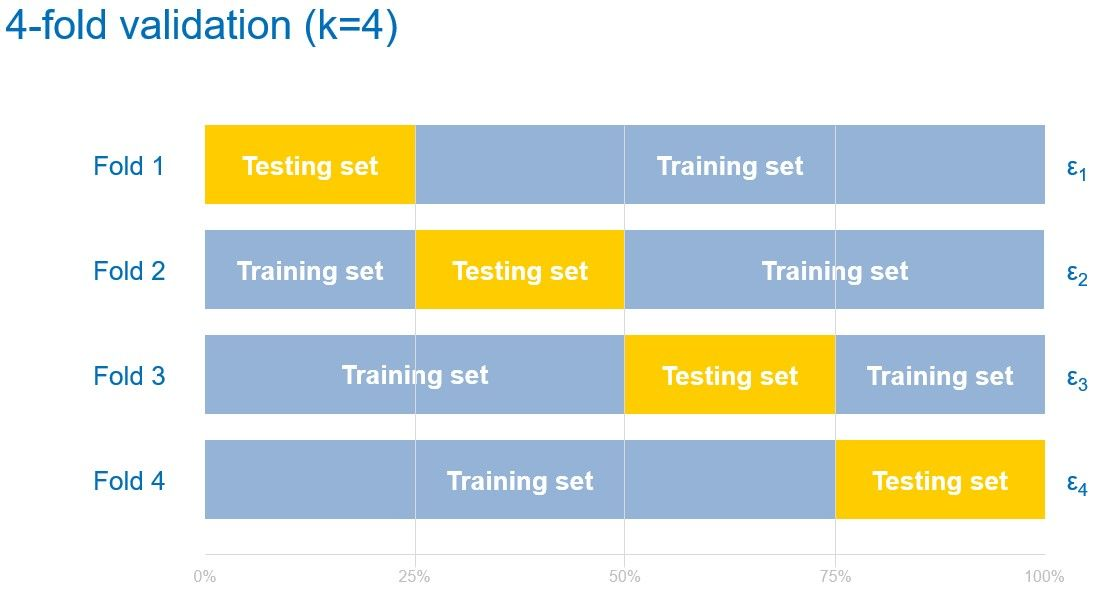

In [ ]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.svm  import SVC

X = balanced_dataset.drop(columns = ['Target']).values

y = balanced_dataset['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

model = SVC(C = 1000,
            gamma = 0.0001,
            verbose = True)

model.fit(X_train ,y_train)

cvs = cross_val_score(estimator = model,
                      X = X_train,
                      y = y_train,
                      n_jobs = -1,
                      cv = 10).mean()

print(f"Cross validation score: {cvs}")

[LibSVM]Cross validation score: 0.9385954641726755


#### Generamos un reporte de clasificacion, usando las metricas basicas para determinar el performance del modelo en la data de test. Se observa que hay un accuracy practicamente igual que en los datos de entrenamiento, de modo que el modelo esta generalizando correctamente.

In [ ]:
from sklearn.metrics import classification_report

y_hat = model.predict(X_test)

print(f"""

Classification report using Support vector machines:

{classification_report(y_test, y_hat)}

""")



Classification report using Support vector machines:

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2384
           1       0.91      0.96      0.94      2448

    accuracy                           0.93      4832
   macro avg       0.93      0.93      0.93      4832
weighted avg       0.93      0.93      0.93      4832





#### Creamos funcion que grafique una matriz de confusion para ver la cantidad de aciertos y desaciertos del modelo.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_conf_matrix(y_test, y_hat) -> None:

  plt.rcParams["figure.figsize"] = (15,7)

  classes = ["No-failure","Failure"]

  confm = confusion_matrix(y_test, y_hat)

  display_conf = ConfusionMatrixDisplay(confusion_matrix = confm, display_labels = classes)

  display_conf.plot(cmap="crest")
  plt.title("Confusion matrix",fontsize = 18)
  plt.xlabel("predicted label",fontsize = 14)
  plt.ylabel("True label",fontsize = 14)
  plt.show()

#### Graficamos matriz de confusion con la funcion previamente creada, a la cual le proporcionamos unicamente los vectores y_true ; y_hat.

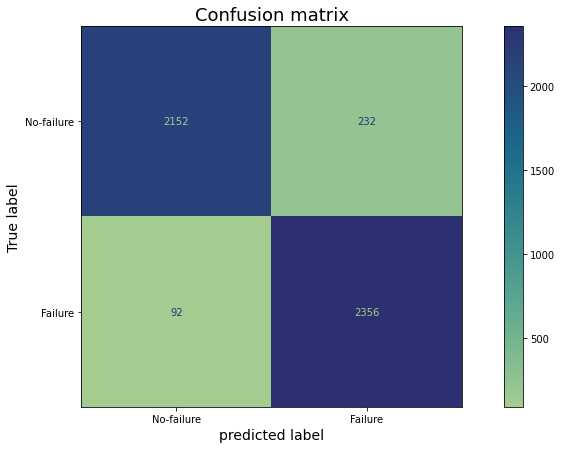

In [ ]:
plot_conf_matrix(y_test, y_hat)

#### Adicionalmente, se crea una red neuronal profunda encapsulada en una clase Neuralnetwork, de forma que se asemeje a la que proporciona sklearn. Esta clase fue creada de manera que se sencillo el uso del modelo, unicamente definiendo parametros como la arqutectura de la red en forma de lista, ej: [2,4,2,1], definir learning rate (lr) y epocas de entrenamiento (epochs). Ademas de algunos aspectos mas avanzados de deep learning como es la inicializacion xavier para los pesos W y la programacion de la derivada de una funcion para derivar de forma dinamica las activaciones propuestas (Relu, Sigmoid). Los metodos mas importantes de la clase, constituyendo f-prop -> Error -> b-prop -> gd, fueron implementadas en base a los algoritmos calculados y generados en un word  de manera digital, de forma que se pueda comprender fundamentalmente como funciona el algoritmo de backpropagation. Estos calculos se adjuntan a continuacion:

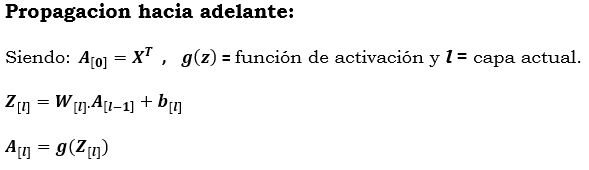

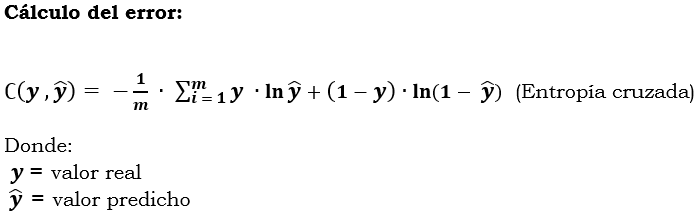

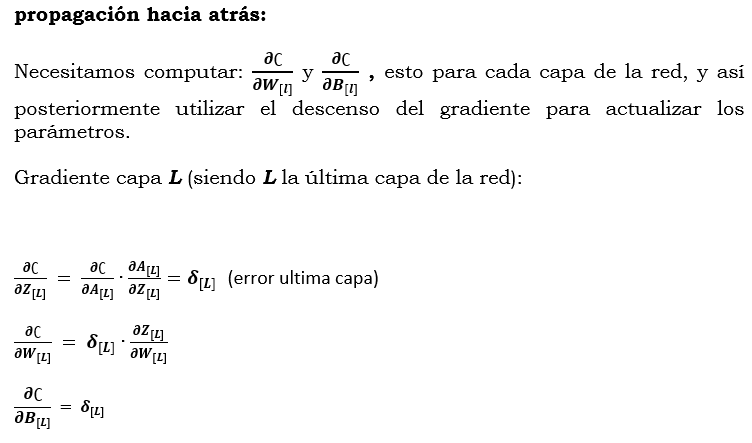

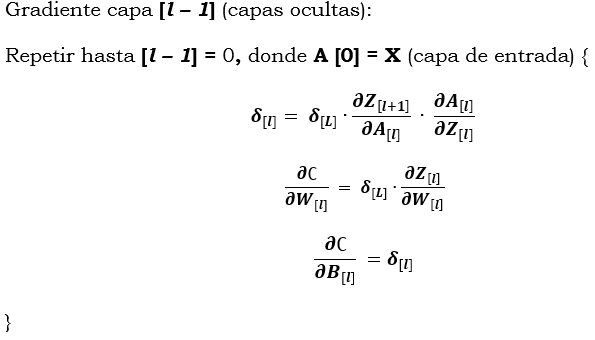

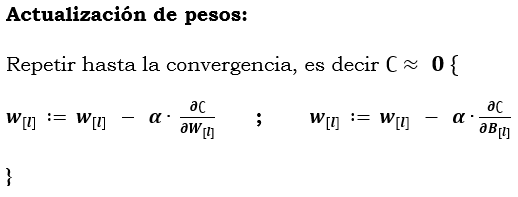

In [ ]:
import pyprind as pr
from sklearn.metrics import accuracy_score

class NeuralNetwork:

  np.random.seed(3)
  
  def __init__(self,arch):
    self.arch = arch
    self.n_params = len(self.arch) 
    self.params = dict()
    self.relu = lambda x : np.maximum(0,x)
    self.sigm = lambda x : 1 / (1 + np.e**-x)

    for p in range(1, self.n_params):

        #Inicializacion Xavier

        self.params[f'W{p}'] = np.random.randn(self.arch[p], self.arch[p-1]) * np.sqrt(2.0/self.arch[p-1])

        self.params[f'b{p}'] = np.zeros((self.arch[p], 1))

    self.L = len(self.params) // 2 


  def forwardprop(self,X):

    tfs = dict() 

    tfs["A0"]  = X.T 

    for l in range(1,self.L):

       Z = np.dot(self.params[f"W{l}"],tfs[f"A{l - 1}"]) + self.params[f"b{l}"]

       tfs[f"Z{l}"] = Z

       tfs[f"A{l}"] = self.relu(Z)

    Z = np.dot(self.params[f"W{self.L}"],tfs[f"A{self.L-1}"]) + self.params[f"b{self.L}"]

    tfs[f"Z{self.L}"] = Z

    tfs[f"A{self.L}"] = self.sigm(Z)

    return  tfs

  def backprop(self,X,y,tfs):

    y = y.reshape(1,y.shape[0])

    m = y.shape[1]

    grads = dict() 

    #Error capa L

    dL = (tfs[f"A{self.L}"] - y)

    grads[f"dW{self.L}"] = (1/m)*np.dot(dL,tfs[f"A{self.L - 1}"].T)

    grads[f"db{self.L}"] = (1/m)*np.sum(dL,keepdims=True,axis=1)

    for l in reversed(range(1,self.L)):

      #Error capa l-1
      
      dL =  (self.params[f"W{l + 1}"].T @ dL)  * self.derivate(self.relu,tfs[f"Z{l}"])

      grads[f"dW{l}"] = (1/m)*np.dot(dL,tfs[f"A{l - 1}"].T)

      grads[f"db{l}"] = (1/m)*np.sum(dL,keepdims=True,axis=1)

    return grads 

  def gradient_descent(self,grads,lr):

    for l in range(1,self.L):

      self.params[f"W{l}"] = self.params[f"W{l}"] - lr*grads[f"dW{l}"]

      self.params[f"b{l}"] = self.params[f"b{l}"] - lr*grads[f"db{l}"]


  def train(self,X,y,epochs,lr=0.01):

    costs = list()
    cost = 0

    bar = pr.ProgBar(epochs,bar_char='#')

    for epoch in range(epochs):

      tfs = self.forwardprop(X)
      
      cost = self.cost(tfs[f"A{self.L}"],y)

      costs.append(cost)

      grads = self.backprop(X,y,tfs)

      self.gradient_descent(grads,lr)

      bar.update(item_id=f"acc: {round(accuracy_score(self.predict(X),y),4)} cost: {cost}")

    return costs

  def predict(self,X):

    TRESH = 0.5

    y_hat = np.array([1 if  i >= TRESH else 0 for i in  self.forwardprop(X)[f"A{self.L}"][0,:]]) 

    return y_hat


  @staticmethod
  def cost(y_hat,y):

    y = y.reshape(1,y.shape[0])

    m = y.shape[1]

    J = lambda y_hat , y : -(1/m) * np.sum(( y*np.log(y_hat) +  (1 - y) *np.log(1 - y_hat)))
    
    J = np.squeeze(J(y_hat,y))   

    return J


  @staticmethod
  def derivate(func,x,h=0.0000000001):
    return (func(x + h) - func(x)) / h


#### Instanciamos el modelo desde la clase NeuralNetwork, definimos arquitectura, learning rate, epocas y entrenamos:

In [ ]:
n_inputs = X_train.shape[1]

nn = NeuralNetwork(arch = [n_inputs, 5, 6, 2, 1])

error = nn.train(X = X_train,
                 y = y_train,
                 epochs = 10000,
                 lr = 0.1)

0% [##############################] 100% | ETA: 00:00:00 | Item ID: acc: 0.964 cost: 0.11127110738196148
Total time elapsed: 00:04:17


#### Graficamos curva de error generada por el modelo.

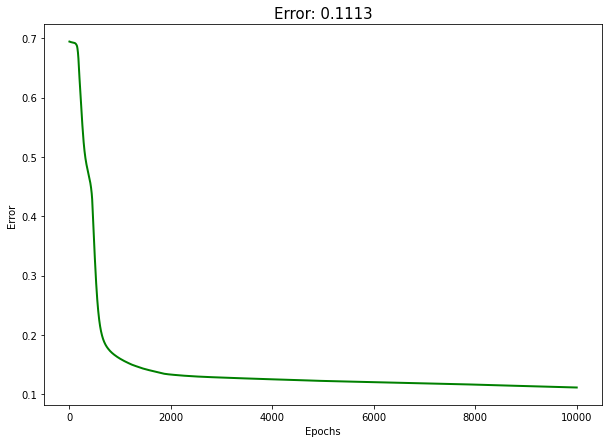

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

sns.lineplot(data = error,
             linewidth = 2,
             color = "green")

plt.title(f"Error: {round(error[-1],4)}",fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

#### Al igual que con la SVM, imprimimos un reporte de clasificacion, esta vez para la red neuronal creada, en donde vemos que esta generalizando correctamente ya que el accuracy de entrenamiento es similar al de test, esto demuestra ausencia de overfitting y por tanto un correcto aprendizaje de este.

In [ ]:
y_pred = nn.predict(X_test)

print(f"""

Classification report using Deep nerual network:

{classification_report(y_test, y_pred)}

""")



Classification report using Deep nerual network:

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2384
           1       0.95      0.97      0.96      2448

    accuracy                           0.96      4832
   macro avg       0.96      0.96      0.96      4832
weighted avg       0.96      0.96      0.96      4832





#### Finalmente graficamos matriza de confusion asociada al modelo de red neuronal.

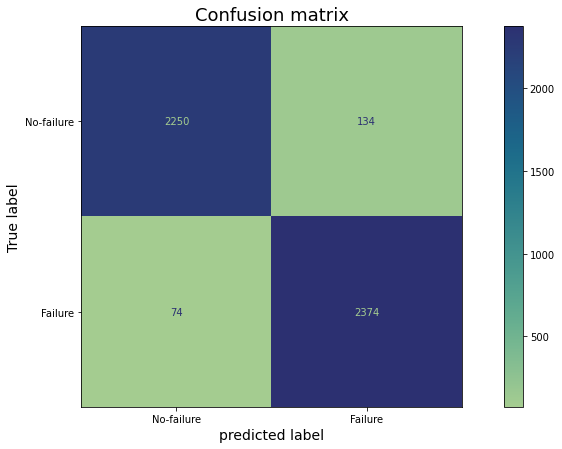

In [ ]:
plot_conf_matrix(y_test, y_pred)